# IMPORT

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

NOTEBOOK_DIR = Path().resolve()  
PROJECT_ROOT = NOTEBOOK_DIR.parent
DATA_DIR = PROJECT_ROOT / "Data"
OUTPUT_DIR = PROJECT_ROOT / "Output"
CLEANED_DATA = OUTPUT_DIR / "Cleaned_data"
FIGURES = OUTPUT_DIR / "Figures"


# LOAD_DATA() Function:

In [14]:
# def load_data():
#     patient = pd.read_csv('data/patient.csv')
#     staff  = pd.read_csv('data/staff.csv')
#     bed = pd.read_csv('data/bed.csv')
#     service = pd.read_csv('data/servicesweekly.csv')
#     print("Found all the files!")
#     return patient, staff, bed, service





def load_data():
    global patient_df
    patient_df = pd.read_csv(DATA_DIR / "patients.csv")
    global staff_df
    staff_df = pd.read_csv(DATA_DIR / "staff.csv")
    global bed_df
    bed_df = pd.read_csv(DATA_DIR / "Hospital_Bed_Capacity_New.csv")
    global service_weekly_df
    service_weekly_df = pd.read_csv(DATA_DIR / "services_weekly.csv")

    print("\n All files are loaded successfully.\n")
    print("-------------------------------------------------------------------------------------")
    print("Patients Data: \n",patient_df.head())
    print("-------------------------------------------------------------------------------------")
    print("\n Staff Data: \n",staff_df.head())
    print("-------------------------------------------------------------------------------------")
    print("\n Beds Data: \n",bed_df.head())
    print("-------------------------------------------------------------------------------------")
    print("\n Services Weekly Data: \n",service_weekly_df.head())
    
load_data()


 All files are loaded successfully.

-------------------------------------------------------------------------------------
Patients Data: 
      patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24    3/16/2025      3/22/2025   
1  PAT-f0644084     Shannon Walker    6   12/13/2025     12/14/2025   
2  PAT-ac6162e4       Julia Torres   24    6/29/2025       7/5/2025   
3  PAT-3dda2bb5    Crystal Johnson   32   10/12/2025     10/23/2025   
4  PAT-08591375        Garrett Lin   25    2/18/2025      2/25/2025   

            service  satisfaction  
0           surgery            61  
1           surgery            83  
2  general_medicine            83  
3         emergency            81  
4               ICU            76  
-------------------------------------------------------------------------------------

 Staff Data: 
        staff_id       staff_name    role    service
0  STF-5ca26577     Allison Hill  doctor  emergency
1  STF-02a

# SAVE_CLEANED_FILES() Function:

In [15]:
# def save_cleaned_files(clean_patient, clean_staff, clean_bed):
    
#     Step-by-step:
#     1. Take cleaned patient data
#     2. Put in "cleaned_patient.csv" 
#     3. Take cleaned staff data
#     4. Put in "cleaned_staff.csv" 
#     5. Take cleaned bed data
#     6. Put in "cleaned_bed.csv"

# when output file is done!


def save_cleaned_files(clean_PAT_data,staff_clean): #def save_cleaned_files(clean_patient, clean_staff, clean_bed): {put ur cleaned data as argument ,whenever ur done and modify the function accordingly }
    
    print("\nSAVING CLEANED DATA TO CSV")
    print("Saving patient data...")
    clean_PAT_data.to_csv(f"{CLEANED_DATA}/clean_PAT_data", index= False)
    staff_clean.to_csv(f"{CLEANED_DATA}/staff_clean", index = False)
    #staff_clean.to_csv("C:/Users/HP/Desktop/Python_Final_Project/Output/Cleaned_data/staff_clean.csv")
    print(f"Patient data saved: {len(clean_PAT_data)} records")
    print(f"Staff data saved: {len(staff_clean)} records")
    print(f"Bed data saved: {len(clean_BED_data)} records")

save_cleaned_files(clean_PAT_data, staff_clean, clean_BED_data)

TypeError: save_cleaned_files() takes 2 positional arguments but 3 were given

# PATIENT_ANALYTICS:

Starting patient data cleaning...
Data Informations: 
->Original Data Shape:  (1008, 7)
->Total Number of Patients:  1008
-------------------------------------------------------
Number of missing values:  12
Number of missing values now:  0
Filled Empty Spaces Successfully:)
-------------------------------------------------------
Number of duplicates:  8
Number of duplicates now:  0
Updated total number of patients:  1000
Removed Duplicates Successfully:)
-------------------------------------------------------
Dates Fixed Successfully:)
--------------------------------------------------------
Ensure Numeric Columns Successfully:)
--------------------------------------------------------
Removing impossible ages (if any)...
Impossible Ages Removed Successfully)
--------------------------------------------------------
Removing imposiible satisfaction percentages (if any)...
Impossible Satisfaction Percentages Removed Successfully:)
Cleaned data size: 
Length: 988 
Shape: (988, 7)
________

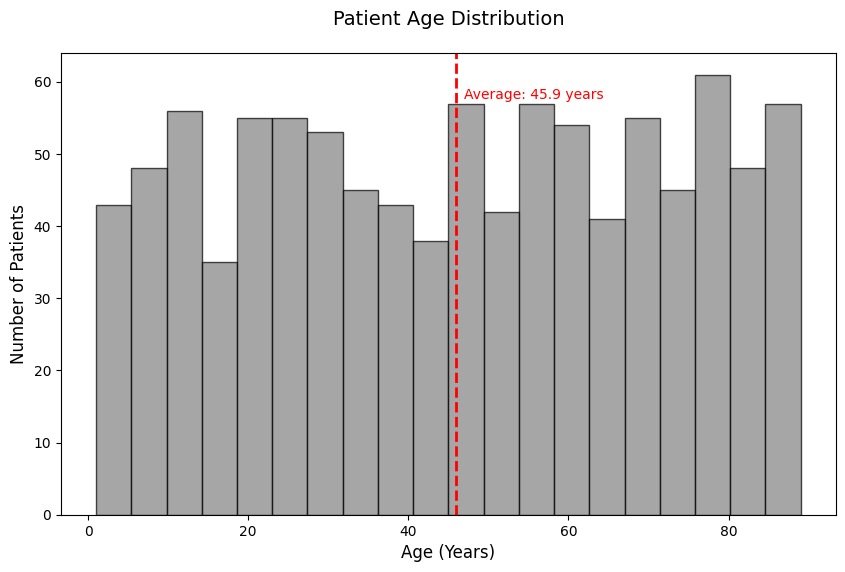

 Plot saved! Average age: 45.9 years


In [ ]:

# Class: PatientAnalytics
#   def clean_patient_data(patient_data) 
        # 1. Look for MISSING data (NaN) → Fill with "Unknown"
        # 2. Look for DUPLICATE data → Keep only one
        # 3. Fix BROKEN dates → Make them same format
        # 4. Check AGE data → Remove impossible ages (like 500 years!)

#   calculate_length_of_stay(patient_data)
        # 1. Check IN date (when they came to hospital)
        # 2. Check OUT date (when they left)
        # 3. Subtract: OUT date - IN date = Sleep days!
        # 4. If still sleeping (no OUT date), count till today
        # (Do it for partient who have left, still in bed,combined)
        # Average no. of days

#   service_distribution(patient_data)
        #   COUNTING SICK TYPES:
        # 1. G1 = Heart patients 
        # 2. G2  = Bone patients 
        # 3. G3  = Stomach patients 
        # 4. Count each group members and numbers of group(if possible)

#   plot_age_distribution(patient_data)
        #     DRAWING AN AGE PICTURE:
        # 1. Get all patient ages
        # 2. Draw a mountain (histogram) showing:
        #    - Where most people are (big mountain)
        #    - Where few people are (small mountain)
        # 3. Color it pretty!
        # 4. Save the drawing


class PatientAnalytics:
    def __init__(self):
        pass

    print("="*80)
    def clean_patient_data(self,patient_df):
        print("Starting patient data cleaning...")
        print("="*80)
        patient_cleaned=patient_df.copy()      
        
        print("Data Informations: ")
        print("->Original Data Shape: ",patient_df.shape)
        print("->Total Number of Patients: ",len(patient_df))


        print("-------------------------------------------------------")
        missing_count = patient_df.isnull().sum().sum()
        print("Number of missing values: ",missing_count)
        patient_cleaned=patient_cleaned.fillna('Unknown')
        missing_count_cleaned=patient_cleaned.isnull().sum().sum()
        print("Number of missing values now: ",missing_count_cleaned)
        print("Filled Empty Spaces Successfully:)")
        


        print("-------------------------------------------------------")
        dup_count = patient_df.duplicated(subset=['patient_id']).sum()
        print("Number of duplicates: ",dup_count)
        patient_cleaned= patient_cleaned.drop_duplicates()
        dup_count_cleaned= patient_cleaned.duplicated(subset=['patient_id']).sum()
        print("Number of duplicates now: ",dup_count_cleaned)
        print("Updated total number of patients: ",len(patient_cleaned))
        print("Removed Duplicates Successfully:)")


        print("-------------------------------------------------------")
        patient_cleaned['arrival_date'] = pd.to_datetime(patient_cleaned['arrival_date'], errors='coerce')
        patient_cleaned['departure_date'] = pd.to_datetime(patient_cleaned['departure_date'], errors='coerce')
        print("Dates Fixed Successfully:)")


        print("--------------------------------------------------------")
        patient_cleaned['age'] = pd.to_numeric(patient_cleaned['age'], errors='coerce')
        patient_cleaned['satisfaction'] = pd.to_numeric(patient_cleaned['satisfaction'], errors='coerce')
        print("Ensure Numeric Columns Successfully:)")

        print("--------------------------------------------------------")
        print("Removing impossible ages (if any)...")
        patient_cleaned = patient_cleaned[(patient_cleaned['age'] > 0) & (patient_cleaned['age'] < 120)]
        print("Impossible Ages Removed Successfully)")


        print("--------------------------------------------------------")
        print("Removing imposiible satisfaction percentages (if any)...")
        patient_cleaned = patient_cleaned[(patient_cleaned['satisfaction'] > 0) & (patient_cleaned['satisfaction'] < 100)]
        print("Impossible Satisfaction Percentages Removed Successfully:)")

        print("Cleaned data size:","\nLength:",len(patient_cleaned),"\nShape:",patient_cleaned.shape)
        print("_"*80)
        

        return patient_cleaned
#-------------------------------------------------------------------------------------------------------------------------------------------------------------
    def calculate_length_of_stay(self, patient_cleaned):

        print("="*80)
        print("Calculation length of days...")
        print("="*80)
    
        patient_cleaned['stay_days'] = (patient_cleaned['departure_date'] - patient_cleaned['arrival_date']).dt.days
    
        stay_array = patient_cleaned['stay_days'].to_numpy()  
    
        avg_stay = np.mean(stay_array)      
        min_stay = np.min(stay_array)      
        max_stay = np.max(stay_array)       

        print("Total patients: ", len(patient_cleaned))
        print("Average stay: ", avg_stay, " days.")
        print("Shortest stay: ", min_stay, " days.")
        print("Longest stay: ", max_stay, " days.")
    
        print("_"*80)
        return patient_cleaned
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
    def service_distribution(self, patient_cleaned):
        
        print("="*80)
        print("Service Distribution...")
        print("="*80)

        result = patient_cleaned.groupby('service').agg({'patient_id': 'count','age': 'mean',  'stay_days': 'mean'})

        result = result.rename(columns={'patient_id': 'patient_count'})
        print(result)
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
    def plot_age_distribution(self,clean_PAT_data):

        plt.figure(figsize=(10, 6))
    
        plt.hist(clean_PAT_data['age'],bins=20,color='grey',edgecolor='black',alpha=0.7)
    
        plt.title('Patient Age Distribution', fontsize=14, pad=20)
        plt.xlabel('Age (Years)', fontsize=12)
        plt.ylabel('Number of Patients', fontsize=12)
    
        avg_age = clean_PAT_data['age'].mean()
        plt.axvline(avg_age, color='red', linestyle='--', linewidth=2)
        plt.text(avg_age+1, plt.ylim()[1]*0.9, 
                 f'Average: {avg_age:.1f} years', 
                color='red')
        plt.savefig(f'{FIGURES}/patient_age_histogram.png')
        plt.show()

       
        print(f" Plot saved! Average age: {avg_age:.1f} years")


analyzer = PatientAnalytics() 
clean_PAT_data = analyzer.clean_patient_data(patient_df)
data_with_stay = analyzer.calculate_length_of_stay(clean_PAT_data)
analyzer.service_distribution(data_with_stay) 
histogram=analyzer.plot_age_distribution(clean_PAT_data) 

# STAFF_ANALYTICS:


Starting staff csv data cleaning...

-------------------------------------------------------------------------
Staff CSV Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   staff_id    110 non-null    object
 1   staff_name  110 non-null    object
 2   role        110 non-null    object
 3   service     110 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB
-------------------------------------------------------------------------
Checking for the numbers of empty rows:
staff_id      0
staff_name    0
role          0
service       0
dtype: int64
-------------------------------------------------------------------------

Renaming Doctor to DR, Nurse to NS, Nursing Assistant to NSA 
        staff_id        staff_name role           service
48  STF-1ded4330      Joshua Blair  NSA           surgery
49  STF-5d51a8ea       Eric Carney  N

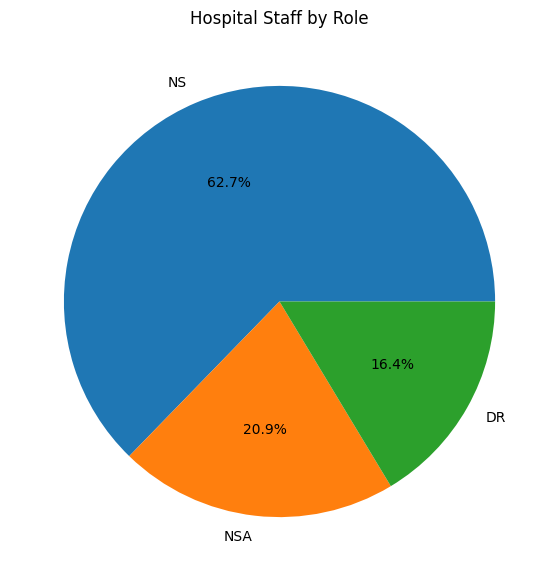

,Staff_ID,Staff_Name,Role,Service,Job
0,STF-5ca26577,Allison Hill,DR,emergency,DR Allison Hill
1,STF-02ae59ca,Noah Rhodes,DR,emergency,DR Noah Rhodes
2,STF-d8006e7c,Angie Henderson,DR,emergency,DR Angie Henderson
3,STF-212d8b31,Daniel Wagner,DR,emergency,DR Daniel Wagner
4,STF-107a58e4,Cristian Santos,DR,emergency,DR Cristian Santos
...,...,...,...,...,...
105,STF-2c8a995d,Marc Moore,NSA,ICU,NSA Marc Moore
106,STF-251c7770,Sharon Cherry,NSA,ICU,NSA Sharon Cherry
107,STF-3fb56209,Sierra Johnson,NSA,ICU,NSA Sierra Johnson
108,STF-a8c30e00,Evelyn Galvan,NSA,ICU,NSA Evelyn Galvan


In [ ]:


# Class: StaffAnalytics
#   clean_staff_data(staff_data)
        # 1. copying dataframe
        # 2. printing dataframe
        # 3. Checking if there are any null rows
        # 4. Fix job titles → Make consistent
        #    ("DR" = "Doctor", "NRS" = "Nurse")
        # 5. Checking duplicates

#   staff_count_by_role(staff_data)
        # Like counting:
        # - How many doctors? 
        # - How many nurses? 
        # - How many nursing assistant? 
        # - How mnay staffs are there in each department

#   staff_service_mapping(staff_data)
        # Which staff works where?
        # 1. Doctor Ahmed → Heart department (1 and 2 if possible)
        # 2. Nurse Sarah → Bone department 
        # 3. Count how many in each department

#   plot_staff_roles(staff_data)
        # Each section = different job
        # Big section = many people
        # Small section = few people
class StaffAnalytics:
     def __init__(self,staff_df):
        self.staff_clean = staff_df.copy()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
   
     def clean_staff_data(self):
        print("\nStarting staff csv data cleaning...\n") 
        
        print("-------------------------------------------------------------------------")
        print("Staff CSV Information:")
        self.staff_clean.info()
        
        print("-------------------------------------------------------------------------")
        print("Checking for the numbers of empty rows:")
        print(self.staff_clean.isnull().sum())

        print("-------------------------------------------------------------------------\n")
        print("Renaming Doctor to DR, Nurse to NS, Nursing Assistant to NSA ")
        self.staff_clean['role']=self.staff_clean['role'].replace({"doctor":"DR",
                                                         "nurse":"NS",
                                                         "nursing_assistant":"NSA"})
        print(self.staff_clean.iloc[48:56])
  
        print("-------------------------------------------------------------------------")
        print("Checking for number of duplicate rows:")
        print(self.staff_clean.duplicated().sum())
  
        print("-------------------------------------------------------------------------")
        print("Renaming columns indexes:")
        self.staff_clean = self.staff_clean.rename(columns = {'staff_id':'Staff_ID',
                                                    'staff_name':'Staff_Name',
                                                    'role':'Role',
                                                    'service':'Service'})
        print(self.staff_clean.head(1))
        print("-------------------------------------------------------------------------")
        
        return self.staff_clean
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
   
     def staff_count_by_role(self):
        

        print("-------------------------------------------------------------------------")
        print("Total staff in each category:")
        total_staff = self.staff_clean.groupby('Role').size()
        print(total_staff)

        print("-------------------------------------------------------------------------")
        print("The number of Doctors, Nurses, and Nursing Assistants in the ICU:")
        ICU_staff = self.staff_clean[self.staff_clean['Service'] == 'ICU'].groupby('Role').size()
        print(ICU_staff)

        print("-------------------------------------------------------------------------")
        print("The number of Doctors, Nurses, and Nursing Assistants in the general medicine:")
        gm_staff = self.staff_clean[self.staff_clean['Service'] == 'general_medicine'].groupby('Role').size()
        print(gm_staff)

        print("-------------------------------------------------------------------------")
        print("The number of Doctors, Nurses, and Nursing Assistants in the surgery:")
        surg_staff = self.staff_clean[self.staff_clean['Service'] == 'surgery'].groupby('Role').size()
        print(surg_staff)

        print("-------------------------------------------------------------------------")
        print("The number of Doctors, Nurses, and Nursing Assistants in the emergency:")
        emg_staff = self.staff_clean[self.staff_clean['Service'] == 'emergency'].groupby('Role').size()
        print(emg_staff)
        
        return self.staff_clean
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
     
     def staff_service_mapping(self):
        
         print("-------------------------------------------------------------------------")
         self.staff_clean['Job'] = self.staff_clean['Role'] + " " + self.staff_clean['Staff_Name']
         detail = dict(zip(self.staff_clean['Job'],self.staff_clean['Service']))
         print("Staff → Department mapping:")
         print (detail)

         print("-------------------------------------------------------------------------")
         print ("Staff working in emergency:")
         Emg_staff = self.staff_clean[self.staff_clean['Service'] == 'emergency']

         for job in Emg_staff['Job']:
           print(job)

         print("-------------------------------------------------------------------------")
         print("Doctors in emergency:")
         dr_emg = self.staff_clean[(self.staff_clean['Service']=='emergency') & (self.staff_clean['Role']=='DR')]
         for doc in dr_emg['Job']:
            print(doc)
         print("-------------------------------------------------------------------------")
         print("Nurse in emergency:")
         ns_emg = self.staff_clean[(self.staff_clean['Service']=='emergency') & (self.staff_clean['Role']=='NS')]
         for NS in ns_emg['Job']:
            print(NS)
         print("-------------------------------------------------------------------------")
         print("Nursing assistant in emergency:")
         na_emg = self.staff_clean[(self.staff_clean['Service']=='emergency') & (self.staff_clean['Role']=='NSA')]
         for NA in na_emg['Job']:
            print(NA)
         
         print("-------------------------------------------------------------------------")
         print("Doctors in surgery:")
         dr_sur = self.staff_clean[(self.staff_clean['Service']=='surgery') & (self.staff_clean['Role']=='DR')]
         for doc in dr_sur['Job']:
            print(doc)
         print("-------------------------------------------------------------------------")
         print("Nurse in surgery:")
         ns_sur = self.staff_clean[(self.staff_clean['Service']=='surgery') & (self.staff_clean['Role']=='NS')]
         for NS in ns_sur['Job']:
            print(NS)
         print("-------------------------------------------------------------------------")
         print("Nursing assistant in surgery:")
         na_sur = self.staff_clean[(self.staff_clean['Service']=='surgery') & (self.staff_clean['Role']=='NSA')]
         for NA in na_sur['Job']:
            print(NA)
              
         print("-------------------------------------------------------------------------")
         print("Doctors in general medicine:")
         dr_gm = self.staff_clean[(self.staff_clean['Service']=='general_medicine') & (self.staff_clean['Role']=='DR')]
         for doc in dr_gm['Job']:
            print(doc)
         print("-------------------------------------------------------------------------")
         print("Nurse in general medicine:")
         ns_gm = self.staff_clean[(self.staff_clean['Service']=='general_medicine') & (self.staff_clean['Role']=='NS')]
         for NS in ns_gm['Job']:
            print(NS)
         print("-------------------------------------------------------------------------")
         print("Nursing assistant in general medicine:")
         na_gm = self.staff_clean[(self.staff_clean['Service']=='general_medicine') & (self.staff_clean['Role']=='NSA')]
         for NA in na_gm['Job']:
            print(NA)

         print("-------------------------------------------------------------------------")
         print("Doctors in ICU:")
         dr_ICU = self.staff_clean[(self.staff_clean['Service']=='ICU') & (self.staff_clean['Role']=='DR')]
         for doc in dr_ICU['Job']:
            print(doc)
         print("-------------------------------------------------------------------------")
         print("Nurse in ICU:")
         ns_ICU = self.staff_clean[(self.staff_clean['Service']=='ICU') & (self.staff_clean['Role']=='NS')]
         for NS in ns_ICU['Job']:
            print(NS)
         print("-------------------------------------------------------------------------")
         print("Nursing assistant in ICU:")
         na_ICU= self.staff_clean[(self.staff_clean['Service']=='ICU') & (self.staff_clean['Role']=='NSA')]
         for NA in na_ICU['Job']:
            print(NA)
         print("-------------------------------------------------------------------------")
         print("Percentage of each staff by role:")
         role_counts = self.staff_clean['Role'].value_counts()
         role_percentage = ((role_counts / len(self.staff_clean)) * 100).round(2)
         role_percentage = role_percentage.astype(str) + "%"
         print(role_percentage)
         print("-------------------------------------------------------------------------")
         print("Percentage of each staff by service: ")
         service_counts = self.staff_clean['Service'].value_counts()
         service_percentage = ((service_counts / len(self.staff_clean)) * 100).round(2)
         service_percentage = service_percentage.astype(str) + "%"
         print(service_percentage )

         print("-------------------------------------------------------------------------")
         max_dept = self.staff_clean['Service'].value_counts().idxmax()
         print("Department with highest staff:", max_dept)

         print("-------------------------------------------------------------------------")
         min_dept = self.staff_clean['Service'].value_counts().idxmin()
         print("Department with lowest staff:", min_dept)
         
         return self.staff_clean
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
     def plot_staff_roles(self):
        role_counts = self.staff_clean['Role'].value_counts()
    
        plt.figure(figsize=(7, 7))
        plt.pie(role_counts.values, 
            labels=role_counts.index,
            autopct='%1.1f%%')
    
        plt.title('Hospital Staff by Role')
        plt.savefig(f'{FIGURES}/staff_role_pie_chart.png')
        plt.show()
        return self.staff_clean 

#--------------------------------------------------------------------------------------------------------------------------------------------------------------
 
obj = StaffAnalytics(staff_df)
staff_clean=obj.clean_staff_data()
obj.staff_count_by_role()
obj.staff_service_mapping()
obj.plot_staff_roles()


# BED_MANAGEMENT:

Uncleaned: 27 records
-------------------------------------------------------------------------
Cleaning and formatting bed data...
Converting Department names to title case...
Dropping duplicate departments (keeping first)...
Converting numeric columns and filling missing values with 0...
Calculating Occupied_Beds if missing or zero...
Calculating Occupied_ICU_Beds if missing or zero...
Bed data cleaning complete.
Bed records after cleaning: 25
-------------------------------------------------------------------------
-------------------------------------------------------------------------
Calculating overall hospital bed occupancy...
Total beds: 4420, Occupied beds: 2455, Occupancy: 55.54%
-------------------------------------------------------------------------
-------------------------------------------------------------------------
Calculating ICU bed utilization...
Total ICU beds: 1080, Occupied ICU beds: 612, ICU Occupancy: 56.67%
------------------------------------------------

<Figure size 1200x600 with 0 Axes>

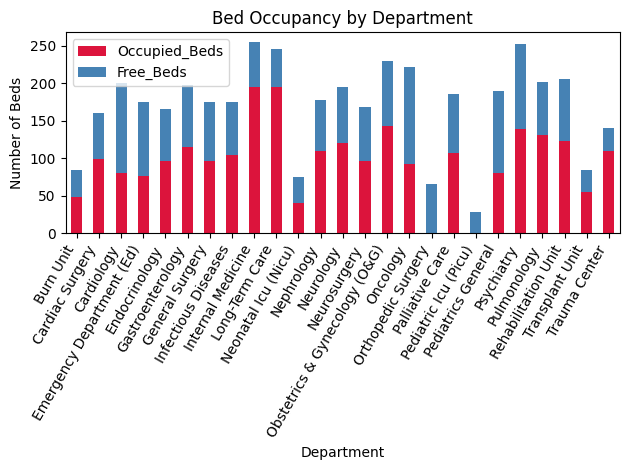

Plot complete.
-------------------------------------------------------------------------


In [ ]:

# Class: BedManagement
#   clean_bed_data(Bed_data)
        # 1. Fix bed numbers 
        # 2. Fix department names
        # 3. Mark beds as: Used/Empty/Broken
        # 4. Remove ghost beds (not in hospital)


#   calculate_occupancy(bed_data)
        # - 80 beds have patients (Occupied)
        # - 20 beds are empty (Vacant)
        # - Percentage = (80/100)×100 = 80% full!


#   icu_utilization(bed_data)
        #  CHECKING EMERGENCY BEDS (ICU):
        # ICU beds are SPECIAL!
        # 1. Find all ICU beds
        # 2. Count how many are used
        # 3. If all are used → Emergency!


#   department_summary(bed_data)
        #BEDS IN EACH DEPARTMENT:
        
        # Count beds in:
        # - Heart department: 20 beds
        # - Bone department: 15 beds
        # - ICU: 10 beds
        # - Children: 25 beds

#   plot_bed_occupancy(bed_data)
        # DRAWING BED PICTURE:
        
        # Draw a BAR CHART
        # Each block = different department
        # Tall block = many beds
        # Short block = few beds

class BedManagement:
    def __init__(self, bed_data: pd.DataFrame):
        self.bed_data = bed_data.copy()  # always work on a copy
        print(f"Uncleaned: {len(bed_data)} records")

    # --------------------------------------------------------------------------------------------------------------------
    def clean_bed_data(self):
        print("-------------------------------------------------------------------------")
        print("Cleaning and formatting bed data...")

        # Fix department names
        print("Converting Department names to title case...")
        if 'Department' in self.bed_data.columns:
            self.bed_data.loc[:, 'Department'] = self.bed_data['Department'].astype(str).str.title()

        # Remove duplicate departments
        print("Dropping duplicate departments (keeping first)...")
        if 'Department' in self.bed_data.columns:
            self.bed_data = self.bed_data.drop_duplicates(subset=['Department'], keep='first').reset_index(drop=True)

        # Convert numeric columns
        numeric_cols = [
            'Total_Beds', 'Free_Beds', 'Total_ICU_Beds', 'Free_ICU_Beds',
            'Total_Amount_of_Beds', 'Staff_On_Duty', 'Occupied_Beds', 'Occupied_ICU_Beds'
        ]
        print("Converting numeric columns and filling missing values with 0...")
        for col in numeric_cols:
            if col in self.bed_data.columns:
                self.bed_data.loc[:, col] = pd.to_numeric(self.bed_data[col], errors='coerce').fillna(0)

        # Fix Occupied_Beds
        print("Calculating Occupied_Beds if missing or zero...")
        if 'Total_Beds' in self.bed_data.columns and 'Free_Beds' in self.bed_data.columns:
            if 'Occupied_Beds' not in self.bed_data.columns or self.bed_data['Occupied_Beds'].sum() == 0:
                self.bed_data.loc[:, 'Occupied_Beds'] = self.bed_data['Total_Beds'] - self.bed_data['Free_Beds']

        # Fix Occupied_ICU_Beds
        print("Calculating Occupied_ICU_Beds if missing or zero...")
        if 'Total_ICU_Beds' in self.bed_data.columns and 'Free_ICU_Beds' in self.bed_data.columns:
            if 'Occupied_ICU_Beds' not in self.bed_data.columns or self.bed_data['Occupied_ICU_Beds'].sum() == 0:
                self.bed_data.loc[:, 'Occupied_ICU_Beds'] = self.bed_data['Total_ICU_Beds'] - self.bed_data['Free_ICU_Beds']

        print("Bed data cleaning complete.")
        print(f"Bed records after cleaning: {len(self.bed_data)}")
        print("-------------------------------------------------------------------------")
        return self.bed_data

    # --------------------------------------------------------------------------------------------------------------------
    def calculate_occupancy(self):
        print("-------------------------------------------------------------------------")
        print("Calculating overall hospital bed occupancy...")

        if 'Total_Beds' not in self.bed_data.columns or 'Occupied_Beds' not in self.bed_data.columns:
            print("Required columns missing: 'Total_Beds' and/or 'Occupied_Beds'.")
            return None

        total_beds = self.bed_data['Total_Beds'].sum()
        occupied_beds = self.bed_data['Occupied_Beds'].sum()

        occupancy_percentage = (occupied_beds / total_beds) * 100 if total_beds > 0 else 0
        print(f"Total beds: {int(total_beds)}, Occupied beds: {int(occupied_beds)}, Occupancy: {occupancy_percentage:.2f}%")
        print("-------------------------------------------------------------------------")
        return occupancy_percentage

    # --------------------------------------------------------------------------------------------------------------------
    def icu_utilization(self):
        print("-------------------------------------------------------------------------")
        print("Calculating ICU bed utilization...")

        if 'Total_ICU_Beds' not in self.bed_data.columns or 'Occupied_ICU_Beds' not in self.bed_data.columns:
            print("Required columns missing: 'Total_ICU_Beds' and/or 'Occupied_ICU_Beds'.")
            return None

        total_icu = self.bed_data['Total_ICU_Beds'].sum()
        occupied_icu = self.bed_data['Occupied_ICU_Beds'].sum()
        icu_percentage = (occupied_icu / total_icu) * 100 if total_icu > 0 else 0

        print(f"Total ICU beds: {int(total_icu)}, Occupied ICU beds: {int(occupied_icu)}, ICU Occupancy: {icu_percentage:.2f}%")
        if occupied_icu >= total_icu:
            print("All ICU beds are occupied.")
        elif icu_percentage > 90:
            print(" ICU almost full!")

        print("-------------------------------------------------------------------------")
        return {'occupied_icu': int(occupied_icu), 'total_icu': int(total_icu), 'icu_percentage': icu_percentage}

    # --------------------------------------------------------------------------------------------------------------------
    def department_summary(self):
        print("-------------------------------------------------------------------------")
        print("Generating department-wise bed summary...")

        if 'Department' not in self.bed_data.columns or 'Total_Beds' not in self.bed_data.columns:
            print("Required columns missing: 'Department' and/or 'Total_Beds'.")
            return None

        summary = self.bed_data[['Department', 'Total_Beds']].set_index('Department').copy()
        for dept, row in summary.iterrows():
            print(f"- {dept}: {int(row['Total_Beds'])} beds")

        print("-------------------------------------------------------------------------")
        return summary

    # --------------------------------------------------------------------------------------------------------------------
    def plot_bed_occupancy(self):
        print("-------------------------------------------------------------------------")
        print("Plotting bed occupancy by department...")

        required_cols = ['Department', 'Occupied_Beds', 'Free_Beds']
        for col in required_cols:
            if col not in self.bed_data.columns:
                print(f"Column '{col}' missing! Cannot plot.")
                return None

        # Group by department and sum beds
        plot_df = self.bed_data.groupby('Department')[['Occupied_Beds','Free_Beds']].sum()

        plt.figure(figsize=(12,6))
        plot_df.plot(kind='bar', stacked=True, color=['crimson','steelblue'])
        plt.title("Bed Occupancy by Department")
        plt.ylabel("Number of Beds")
        plt.xticks(rotation=60, ha='right')  # rotated labels
        plt.tight_layout()
        plt.show()

        print("Plot complete.")
        print("-------------------------------------------------------------------------")
        return plt



#--------------------------------------------------------------------------------------------------------------------------------------------------------------

bed_analyzer = BedManagement(bed_df)
clean_BED_data = bed_analyzer.clean_bed_data()
occupancy_percentage = bed_analyzer.calculate_occupancy()
icu_info = bed_analyzer.icu_utilization()
dept_summary = bed_analyzer.department_summary()
pie_chart=bed_analyzer.plot_bed_occupancy()




# Visualization of Service_weekly

Avgerage Admissions:  28.129807692307693
Maximum Requests:  388
Minimum Requests:  5
Refusal Rate:  56.63677462387905
Average Beds Available:  30.346153846153847


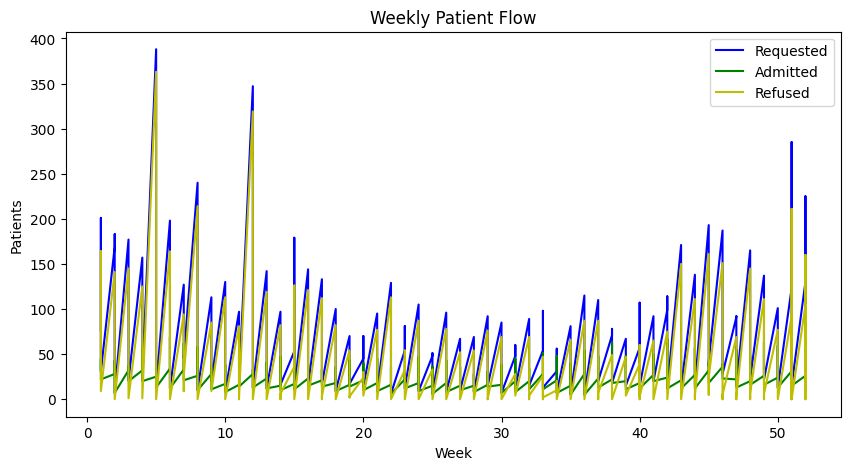

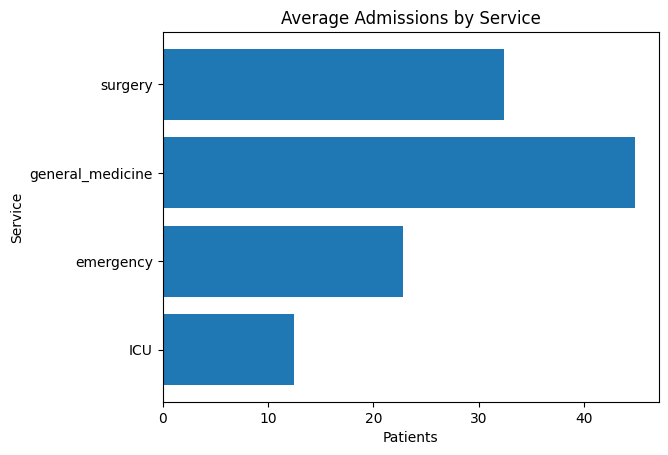

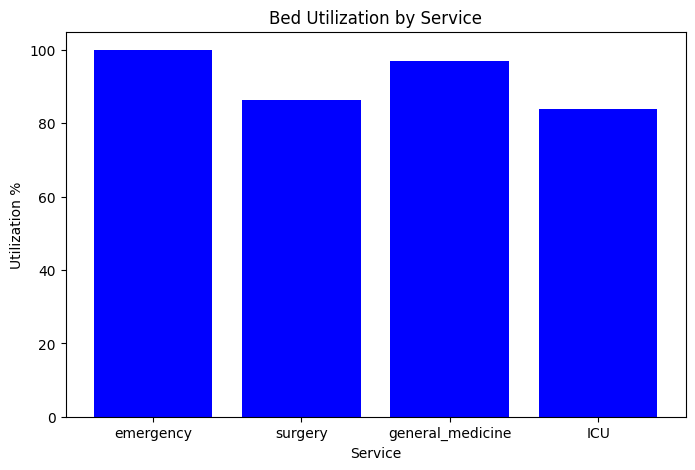

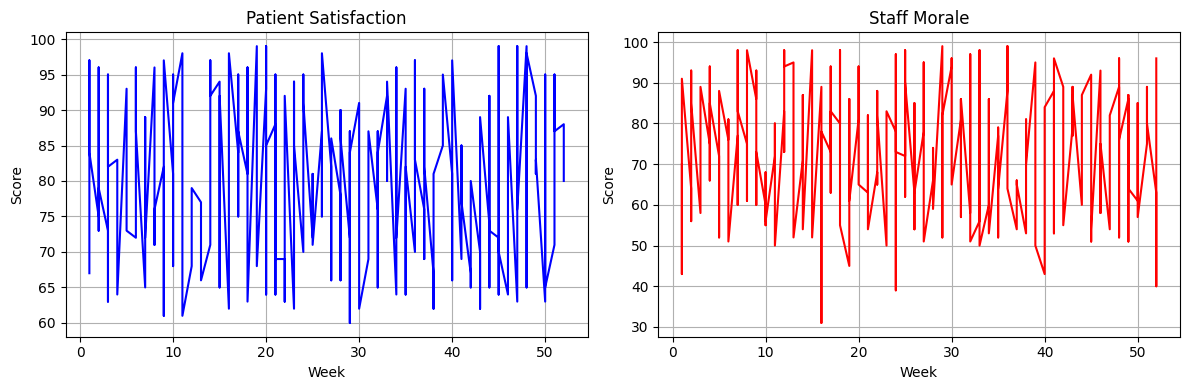

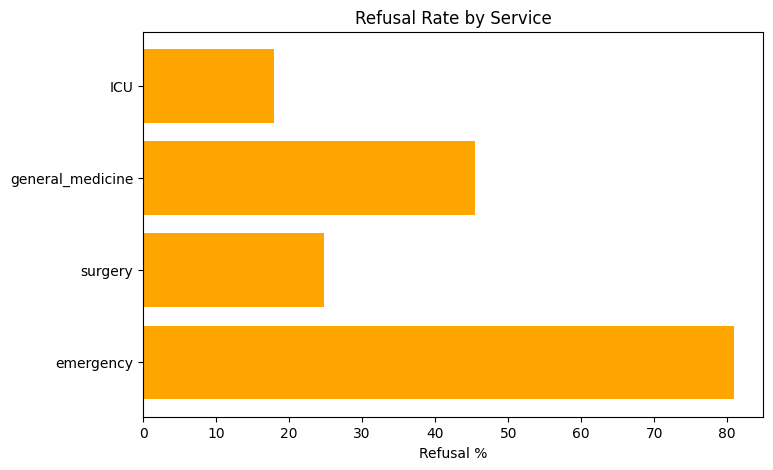

In [ ]:
# class ServiceAnalytics:
#   plot_patient_flow():
#   plot_service_comparison():
#   plot_bed_utilization():
#   plot_satisfaction_trend(): 
#   plot_refusal_rate():
#   compute_service_statistics():
       


class ServiceAnalytics():
        def __init__(self):
                pass
        def plot_patient_flow(self, service_data):

                plt.figure(figsize=(10, 5))
    
                plt.plot(service_data['week'], service_data['patients_request'], 'b-', label='Requested')
                plt.plot(service_data['week'], service_data['patients_admitted'], 'g-', label='Admitted')
                plt.plot(service_data['week'], service_data['patients_refused'], 'y-', label='Refused')
    
                plt.title('Weekly Patient Flow')
                plt.xlabel('Week')
                plt.ylabel('Patients')
                plt.legend()

                plt.savefig(f'{FIGURES}/service_linegraph.png')
                plt.show()
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
        def plot_service_comparison(self, service_data):

                avg_admissions = service_data.groupby('service')['patients_admitted'].mean()
    
                plt.barh(list(avg_admissions.index), list(avg_admissions.values))
    
                plt.title('Average Admissions by Service')
                plt.xlabel('Patients')
                plt.ylabel('Service')
                plt.savefig(f'{FIGURES}/service_hori_barchart.png')
                plt.show()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
        def plot_bed_utilization(self, service_data):
                util_data = {}
    
                for service in service_data['service'].unique():
                        service_df = service_data[service_data['service'] == service]
                        total_beds = service_df['available_beds'].sum()
                        total_patients = service_df['patients_admitted'].sum()
                        utilization = (total_patients / total_beds) * 100
                        util_data[service] = utilization
    
                plt.figure(figsize=(8, 5))
                plt.bar(util_data.keys(), util_data.values(), color='blue')
        
                plt.title('Bed Utilization by Service')
                plt.xlabel('Service')
                plt.ylabel('Utilization %')
                plt.savefig(f'{FIGURES}/service_ver_bar.png')
                plt.show()
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
        def plot_satisfaction_trend(self, service_data):
  
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

                ax1.plot(service_data['week'], service_data['patient_satisfaction'], 'b-')
                ax1.set_title('Patient Satisfaction')
                ax1.set_xlabel('Week')
                ax1.set_ylabel('Score')
                ax1.grid(True)

                ax2.plot(service_data['week'], service_data['staff_morale'], 'r-')
                ax2.set_title('Staff Morale')
                ax2.set_xlabel('Week')
                ax2.set_ylabel('Score')
                ax2.grid(True)
    
                plt.tight_layout()
                plt.savefig(f'{FIGURES}/service_satisfcation_morale_linegraph.png')
                plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------------------------------
        def plot_refusal_rate(self, service_data):
  
                refusal_rates = {}
                for service in service_data['service'].unique():
                        df = service_data[service_data['service'] == service]
                        rate = (df['patients_refused'].sum() / df['patients_request'].sum()) * 100
                        refusal_rates[service] = rate
    
                plt.figure(figsize=(8, 5))
                plt.barh(list(refusal_rates.keys()), list(refusal_rates.values()), color='orange')
                plt.title('Refusal Rate by Service')
                plt.xlabel('Refusal %')

                plt.savefig(f'{FIGURES}/service_refusal_rate.png')
                plt.show()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------
        def compute_service_statistics(self, service_data):

                admissions = np.array(service_data['patients_admitted'])
                requests = np.array(service_data['patients_request'])
                refusals = np.array(service_data['patients_refused'])
                beds= np.array(service_data['available_beds'])

                print("Avgerage Admissions: ",admissions.mean())
                print("Maximum Requests: ",requests.max())
                print("Minimum Requests: ",requests.min())
                print("Refusal Rate: ", (np.sum(refusals) / np.sum(requests) * 100))
                print("Average Beds Available: ",beds.mean())

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------
analyzer_service=ServiceAnalytics()
service_stats=analyzer_service.compute_service_statistics(service_weekly_df)
linegraph=analyzer_service.plot_patient_flow(service_weekly_df)
hori_barchart=analyzer_service.plot_service_comparison(service_weekly_df)
ver_barchart=analyzer_service.plot_bed_utilization(service_weekly_df)
trend=analyzer_service.plot_satisfaction_trend(service_weekly_df)
hori_bar2=analyzer_service.plot_refusal_rate(service_weekly_df)


# PERFORM_EDA() Function:

In [ ]:
# def perform_eda(patient_data, staff_data, bed_data, service_data):

#     1. PATIENT DISCOVERY:
#        - How many patients?
#        - Oldest? Youngest?
#        - Most common sickness?
#        - Average age
#        - Satisfaction average
#        - Important date
    
#     2. STAFF DISCOVERY:
#        - How many staff?
#        - Most common job?
#        - Biggest department?
    
#     3. BED DISCOVERY:
#        - How many beds?
#        - Busiest department?
#        - Emergency status?
    
#     4. SERVICE DISCOVERY:
#        - Busiest day?
#        - Most common service?
def perform_eda(clean_PAT_data):    #def perform_eda(patient_cleaned, staff_data, bed_data):
    print("\n---PATIENT DISCOVERIES:----")
    # 1. SATISTICS
    print(f"1. Total patients: {len(clean_PAT_data)}")
    print(f"2. Oldest patient: {clean_PAT_data['age'].max()} years")
    print(f"3. Youngest patient: {clean_PAT_data['age'].min()} years")
    print(f"4. Average age: {clean_PAT_data['age'].mean()} years")
    print(f"6. Most common service: {clean_PAT_data['service'].mode()[0]}")
    print(f"7. Satisfaction average: {clean_PAT_data['satisfaction'].mean()}/100")
    print("Important Dates:")
    print(f"-> First patient arrival: {clean_PAT_data['arrival_date'].min().date()}")
    print(f"-> Last patient arrival: {clean_PAT_data['arrival_date'].max().date()}")
    print(f"-> First patient discharge: {clean_PAT_data['departure_date'].min().date()}")
    print(f"-> Last patient discharge: {clean_PAT_data['departure_date'].max().date()}")
    print(f"-> Total treatment period: {clean_PAT_data['arrival_date'].min().date()} to {clean_PAT_data['departure_date'].max().date()}")
    print()
    print(clean_PAT_data['satisfaction'].describe())  
    print("------------------------------------------------------------------------------------------------------------")
    # 2. TABLES
    print("\n---FREQUENCY TABLES---")
    print("\nService Counts:")
    print(clean_PAT_data['service'].value_counts())
    # 3. CORRELATION
    print("\n---CORRELATIONS---")
    corr = clean_PAT_data['age'].corr(clean_PAT_data['satisfaction'])
    print(f"Age vs Satisfaction: {corr:.3f}") 
    # 4. DISTRIBUTIONS
    print("\n---DISTRIBUTION STATS---")
    print("\nAge distribution:")
    print(clean_PAT_data['age'].describe())

perform_eda(clean_PAT_data)

#------------------------------------------------------------------------------------------------------------------------------------------------------------
def perform_eda_beds(clean_BED_data):
    print("\n------------BED DISCOVERIES:--------------")

    if clean_BED_data is None or clean_BED_data.empty:
        print("No bed data available.")
        return

    # ------------------ 1. STATISTICS ------------------
    print("\n---STATISTICS---")
    total_beds = clean_BED_data['Total_Beds'].sum()
    occupied_beds = clean_BED_data['Occupied_Beds'].sum()
    free_beds = clean_BED_data['Free_Beds'].sum()
    occupancy_pct = (occupied_beds / total_beds) * 100 if total_beds > 0 else 0

    total_icu = clean_BED_data['Total_ICU_Beds'].sum()
    occupied_icu = clean_BED_data['Occupied_ICU_Beds'].sum()
    icu_pct = (occupied_icu / total_icu) * 100 if total_icu > 0 else 0

    print(f"1. Total beds: {int(total_beds)}")
    print(f"2. Occupied beds: {int(occupied_beds)}")
    print(f"3. Free beds: {int(free_beds)}")
    print(f"4. Overall occupancy: {occupancy_pct:.2f}%")
    print(f"5. Total ICU beds: {int(total_icu)}")
    print(f"6. Occupied ICU beds: {int(occupied_icu)}")
    print(f"7. ICU occupancy: {icu_pct:.2f}%")
    if occupied_icu >= total_icu:
        print("-> Emergency! All ICU beds are occupied.")

    print()
    print(clean_BED_data[['Total_Beds','Occupied_Beds','Free_Beds','Total_ICU_Beds','Occupied_ICU_Beds']].describe())

    # ------------------ 2. FREQUENCY TABLES ------------------
    print("\n----------FREQUENCY TABLES----------")
    print("\nBeds per Department:")
    print(clean_BED_data.groupby('Department')[['Total_Beds','Occupied_Beds','Free_Beds']].sum())

    # ------------------ 3. CORRELATIONS ------------------
    print("\n----------CORRELATIONS----------")
    if 'Occupied_Beds' in clean_BED_data.columns and 'Total_Beds' in clean_BED_data.columns:
        corr_total_occupied = clean_BED_data['Total_Beds'].corr(clean_BED_data['Occupied_Beds'])
        print(f"Total Beds vs Occupied Beds: {corr_total_occupied:.3f}")
    if 'Free_Beds' in clean_BED_data.columns and 'Occupied_Beds' in clean_BED_data.columns:
        corr_free_occupied = clean_BED_data['Free_Beds'].corr(clean_BED_data['Occupied_Beds'])
        print(f"Free Beds vs Occupied Beds: {corr_free_occupied:.3f}")

    # ------------------ 4. DISTRIBUTIONS ------------------
    print("\n----------DISTRIBUTION STATS-----------")
    print("\nOccupied Beds distribution:")
    print(clean_BED_data['Occupied_Beds'].describe())
    print("\nFree Beds distribution:")
    print(clean_BED_data['Free_Beds'].describe())
    print("\nICU Beds distribution:")
    print(clean_BED_data['Occupied_ICU_Beds'].describe())

    print("------------------------------------------------------------------------------------------------------------")


perform_eda_beds(clean_BED_data)
#------------------------------------------------------------------------------------------------------------------------------------------------------------
def perform_eda_staff(staff_clean):
    print("\n------------STAFF DISCOVERIES:--------------")
    
    if staff_clean is None or staff_clean.empty:
        print("No staff data available.")
        return

    # ------------------ 1. STATISTICS ------------------
    print("\n---STATISTICS---")
    print(f"1. Total staff: {len(staff_clean)}")
    print(f"2. Most common role: {staff_clean['Role'].mode()[0]}")
    print(f"3. Department with most staff: {staff_clean['Service'].mode()[0]}")
    
    print()
    print(staff_clean.describe())

    # ------------------ 2. FREQUENCY TABLES ------------------
    print("\n----------FREQUENCY TABLES----------")
    print("\nStaff per Role:")
    print(staff_clean['Role'].value_counts())
    
    print("\nStaff per Service:")
    print(staff_clean['Service'].value_counts())

    print("------------------------------------------------------------------------------------------------------------")

perform_eda_staff(staff_clean)
#------------------------------------------------------------------------------------------------------------------------------------------------------------


---PATIENT DISCOVERIES:----
1. Total patients: 988
2. Oldest patient: 89 years
3. Youngest patient: 1 years
4. Average age: 45.88765182186235 years
6. Most common service: emergency
7. Satisfaction average: 79.57287449392713/100
Important Dates:
-> First patient arrival: 2025-01-02
-> Last patient arrival: 2025-12-31
-> First patient discharge: 2025-01-06
-> Last patient discharge: 2026-01-13
-> Total treatment period: 2025-01-02 to 2026-01-13

count    988.000000
mean      79.572874
std       11.555064
min       60.000000
25%       70.000000
50%       80.000000
75%       89.250000
max       99.000000
Name: satisfaction, dtype: float64
------------------------------------------------------------------------------------------------------------

---FREQUENCY TABLES---

Service Counts:
service
emergency           260
surgery             253
ICU                 238
general_medicine    237
Name: count, dtype: int64

---CORRELATIONS---
Age vs Satisfaction: -0.054

---DISTRIBUTION STATS---

